In [1]:
import pandas as pd

#Data from https://www.tdworld.com/transmission-reliability/article/20969229/extreme-winds-test-wood-pole-strength
data = {
    "RCP": ["RCP 2.6", "RCP 4.5", "RCP 8.5"],
    ".1": [115, 118, 122],  # Wind speeds in mph
    ".05": [120, 122, 128],
    ".02": [125, 128, 135],
    ".01": [130, 135, 144],
    ".002": [138, 144, 150],
}

# Create DF
wind_speed_df = pd.DataFrame(data)

# Display the DataFrame
wind_speed_df

,RCP,.1,.05,.02,.01,.002
0,RCP 2.6,115,120,125,130,138
1,RCP 4.5,118,122,128,135,144
2,RCP 8.5,122,128,135,144,150


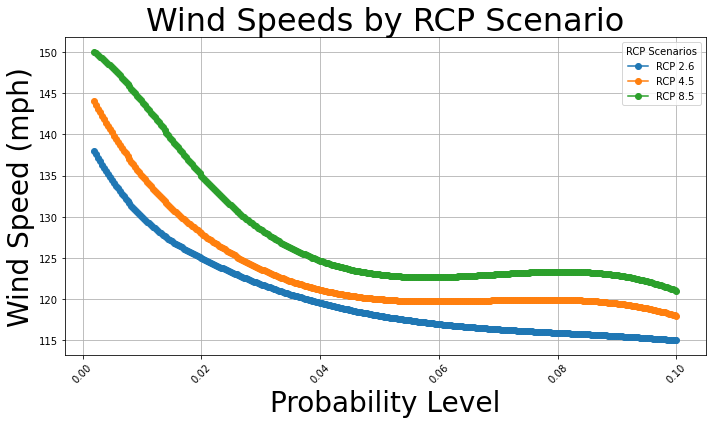

<Figure size 432x288 with 0 Axes>

In [32]:


# Apply the mapping to the index
transposed_df.index = transposed_df.index.map(probability_mapping)
transposed_df = transposed_df.sort_index()  # Sort by index for smooth interpolation

# Plot the smoothed lines
plt.figure(figsize=(10, 6))

# Interpolation
x = transposed_df.index
for column in transposed_df.columns:
    y = transposed_df[column].values
    # Create a new range of x values for smooth curve
    xnew = np.linspace(x.min(), x.max(), 300)
    # Perform spline interpolation
    spl = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
    ynew = spl(xnew)
    
    plt.plot(xnew, ynew, label=column, marker='o')

plt.title('Wind Speeds by RCP Scenario', size = 32)
plt.xlabel('Probability Level', size = 28)
plt.ylabel('Wind Speed (mph)', size = 28)
plt.grid(True)
plt.legend(title='RCP Scenarios')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()
plt.savefig('wind_speeds_rcp_scenario.jpg')  


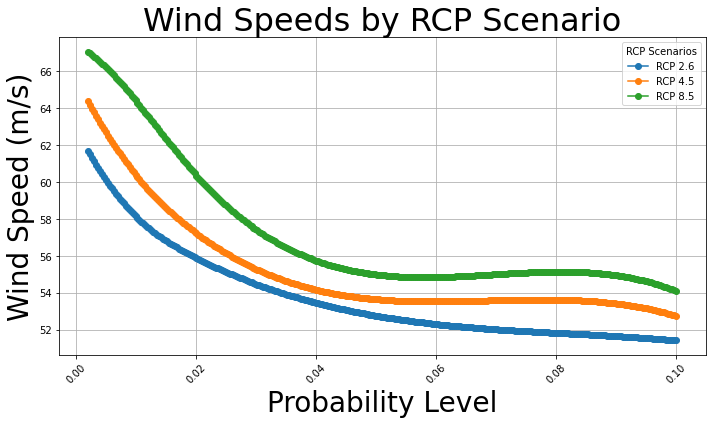

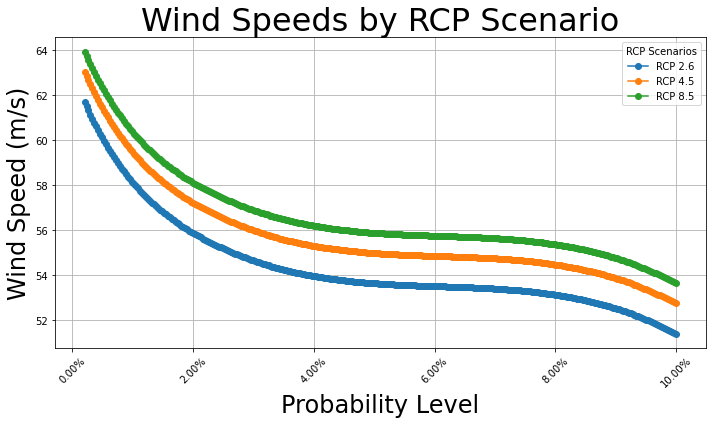

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter

# Data from https://www.tdworld.com/transmission-reliability/article/20969229/extreme-winds-test-wood-pole-strength
data = {
    "RCP": ["RCP 2.6", "RCP 4.5", "RCP 8.5"],
    ".1": [115, 118, 120],  # Wind speeds in mph
    ".05": [120, 123, 125],
    ".02": [125, 128, 130],
    ".01": [130, 133, 135],
    ".002": [138, 141, 143],
}

# Convert MPH to M/S
def mph_to_mps(mph):
    return mph * 0.44704

# Create DataFrame
wind_speed_df = pd.DataFrame(data)

# Convert wind speeds to M/S
for col in wind_speed_df.columns[1:]:
    wind_speed_df[col] = wind_speed_df[col].apply(mph_to_mps)

# Transpose the DataFrame and set the index
transposed_df = wind_speed_df.set_index('RCP').T

# Map probability levels to numerical values
probability_mapping = {
    '.1': 0.1,
    '.05': 0.05,
    '.02': 0.02,
    '.01': 0.01,
    '.002': 0.002
}

# Apply the mapping to the index
transposed_df.index = transposed_df.index.map(probability_mapping)
transposed_df = transposed_df.sort_index()  # Sort by index for smooth interpolation

# Plot the smoothed lines
plt.figure(figsize=(10, 6))

# Interpolation
x = transposed_df.index
for column in transposed_df.columns:
    y = transposed_df[column].values
    # Create a new range of x values for smooth curve
    xnew = np.linspace(x.min(), x.max(), 300)
    # Perform spline interpolation
    spl = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
    ynew = spl(xnew)
    
    plt.plot(xnew, ynew, label=column, marker='o')

# Convert x-axis ticks to percentage format with 2 decimal points
def percent_formatter(x, pos):
    return f'{x * 100:.2f}%'

plt.gca().xaxis.set_major_formatter(FuncFormatter(percent_formatter))

plt.title('Wind Speeds by RCP Scenario', size = 32)
plt.xlabel('Probability Level', size = 24)
plt.ylabel('Wind Speed (m/s)', size = 24)
plt.grid(True)
plt.legend(title='RCP Scenarios')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to a PNG file
plt.savefig('wind_speeds_rcp_scenario.jpg', dpi=300)  # Save with high resolution

# Show plot
plt.show()


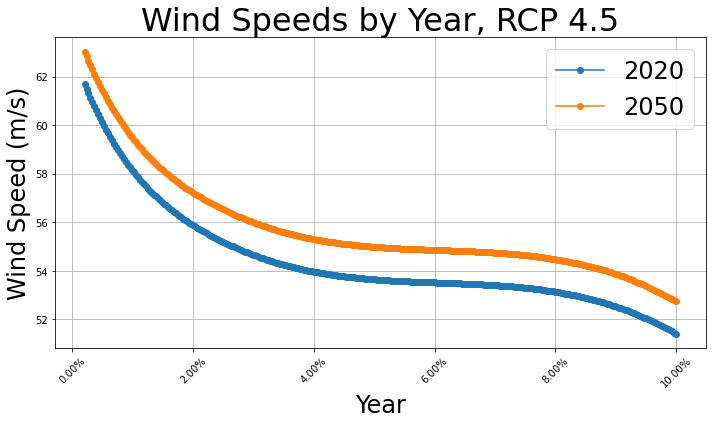

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter

data = {
    "Year": ["2020", "2050"],
    ".1": [115, 118],  # Wind speeds in mph
    ".05": [120, 123],
    ".02": [125, 128],
    ".01": [130, 133],
    ".002": [138, 141],
}

# Convert MPH to M/S
def mph_to_mps(mph):
    return mph * 0.44704

# Create DataFrame
wind_speed_df = pd.DataFrame(data)

# Convert wind speeds to M/S
for col in wind_speed_df.columns[1:]:
    wind_speed_df[col] = wind_speed_df[col].apply(mph_to_mps)

# Transpose the DataFrame and set the index
transposed_df = wind_speed_df.set_index('Year').T

# Map probability levels to numerical values
probability_mapping = {
    '.1': 0.1,
    '.05': 0.05,
    '.02': 0.02,
    '.01': 0.01,
    '.002': 0.002
}

# Apply the mapping to the index
transposed_df.index = transposed_df.index.map(probability_mapping)
transposed_df = transposed_df.sort_index()  # Sort by index for smooth interpolation

# Plot the smoothed lines
plt.figure(figsize=(10, 6))

# Interpolation
x = transposed_df.index
for column in transposed_df.columns:
    y = transposed_df[column].values
    # Create a new range of x values for smooth curve
    xnew = np.linspace(x.min(), x.max(), 300)
    # Perform spline interpolation
    spl = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
    ynew = spl(xnew)
    
    plt.plot(xnew, ynew, label=column, marker='o')

# Convert x-axis ticks to percentage format with 2 decimal points
def percent_formatter(x, pos):
    return f'{x * 100:.2f}%'

plt.gca().xaxis.set_major_formatter(FuncFormatter(percent_formatter))

plt.title('Wind Speeds by Year, RCP 4.5', size = 32)
plt.xlabel('Year', size = 24)
plt.ylabel('Wind Speed (m/s)', size = 24)
plt.grid(True)
plt.legend(title='', fontsize = 24)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to a PNG file
plt.savefig('wind_speeds_Year_scenario.jpg', dpi=300)  # Save with high resolution

# Show plot
plt.show()